In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="ticks")

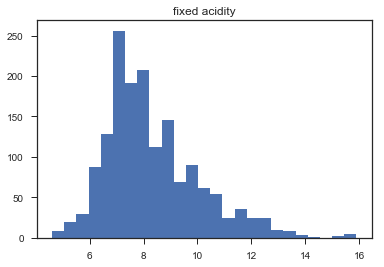

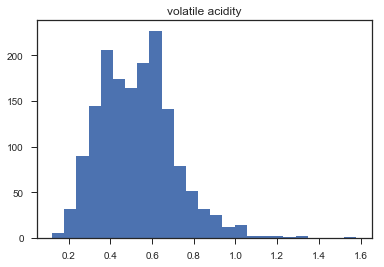

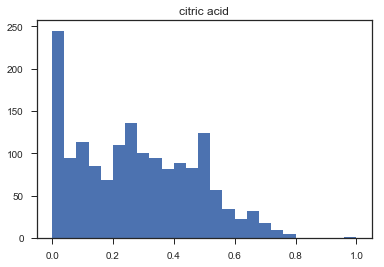

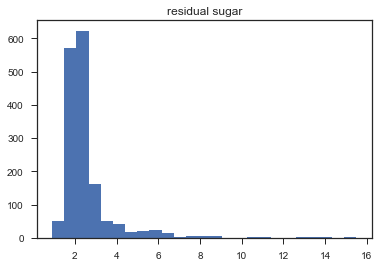

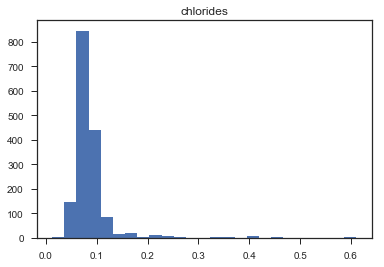

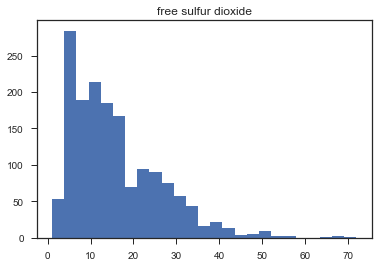

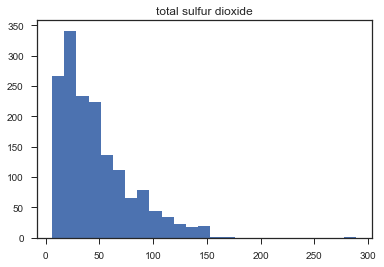

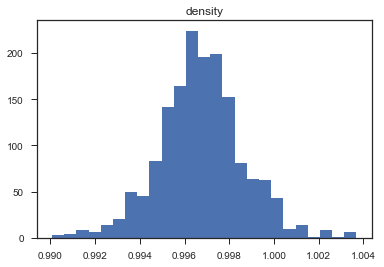

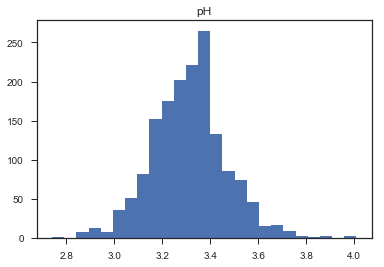

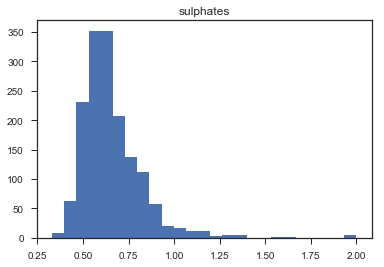

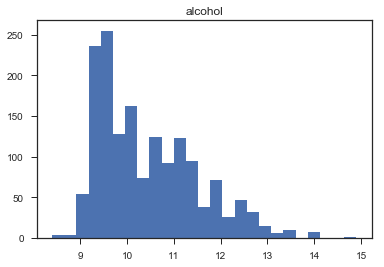

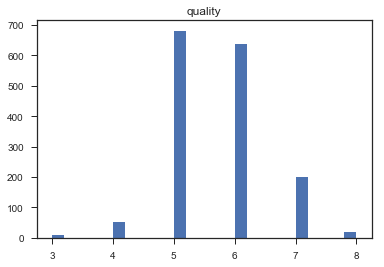

In [3]:
# =============================================================================
# I. Preprocessing
# =============================================================================
data = pd.read_csv('winequality-red.csv', sep=';')
data_2=data.values
titles=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
        'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']

s=data.shape

cleaned_data = np.zeros((1451,s[1]))
mean_col=np.zeros(s[1])
std_col=np.zeros(s[1])



for j in range(s[1]):
    mean_col[j]=np.mean(data_2[:,j])
    std_col[j]=np.std(data_2[:,j])

a=0    
for i in range(s[0]):
    b=0
    for j in range(s[1]):
        if (data_2[i,j]>mean_col[j]+3*std_col[j] or data_2[i,j]<mean_col[j]-3*std_col[j]):
            b=b+1
    if b==0:
        cleaned_data[a,:] = data_2[i,:]
        a=a+1    
        
        
for k in range(s[1]):
    plt.hist(data_2[:,k], bins = 25)
    plt.title(titles[k])
    plt.show()        



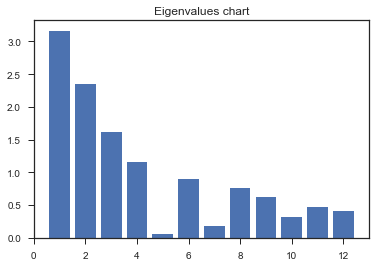

In [7]:
# =============================================================================
# PCA
# =============================================================================

X = cleaned_data 

###Normalisation###
mean = sum(X[:])/len(X)
var = sum(X[:]**2/len(X))-mean**2
X = X[:]-mean
X = X[:]/(var**(1/2))

###Eigenvalues/vectors###
D_vp,V = np.linalg.eig(np.dot(np.transpose(X),X)/(len(X)-1)) 
D = np.diag(D_vp)

axis_x = [i for i in range(1,13)]
axis_y = [i for i in D_vp]
plt.bar(axis_x,axis_y)
plt.title('Eigenvalues chart')
plt.show()

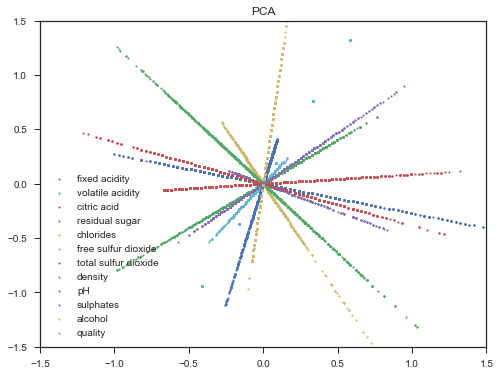

In [19]:
###Projections PCA###
PCA_x = np.zeros((len(X),12))
PCA_y = np.zeros((len(X),12))
for i in range(0,12) : PCA_x[:,i] = X[:,i]*V[i,0] 
for i in range(0,12) : PCA_y[:,i] = X[:,i]*V[i,1] 

plt.figure(figsize=(8, 6)) 
for ii in range(0,12):
    axis_x = [i for i in PCA_x[:,ii]]
    axis_y = [i for i in PCA_y[:,ii]]
    plt.scatter(axis_x, axis_y,s=3, label=titles[ii])
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
plt.legend(loc=3, prop={'size': 10}) 
plt.title('PCA')
plt.show()

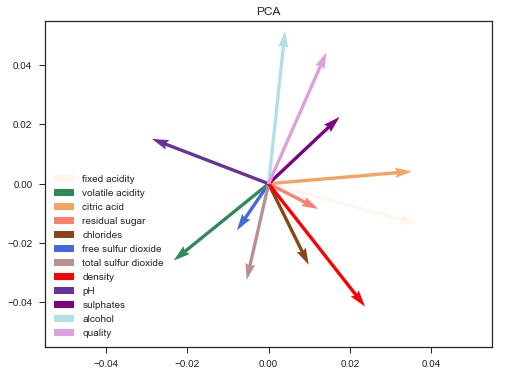

In [27]:
###Format vectoriel###

import matplotlib.colors as colors
colors_list = list(colors._colors_full_map.values())
origin = [0], [0] 

plt.figure(figsize=(8, 6)) 
for ii in range(0,12):
    plt.quiver(*origin,V[ii,0],V[ii,1],scale=1.5,color=colors_list[-ii-40],label=titles[ii])

plt.legend(loc=3, prop={'size': 10}) 
plt.title('PCA')
plt.show()